In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
dfcrop = pd.read_csv("C://Users//muchiri//Desktop//personal ds, ml pjt//crop rec//Crop_recommendation.csv")

In [3]:
dfcrop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
#N - ratio of Nitrogen content in soil
#P - ratio of Phosphorous content in soil
#K - ratio of Potassium content in soil
#ph - ph value of the soil
#rainfall - rainfall in mm

In [5]:
dfcrop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
unique_values = dfcrop['label'].unique()
print (unique_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [7]:
dfcrop.shape

(2200, 8)

In [8]:
dfcrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
dfcrop.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
1575,29,138,197,22.190554,92.437642,5.830892,121.662276,apple
469,19,57,23,23.673433,47.287969,7.342410,141.125072,pigeonpeas
543,37,57,20,31.100625,44.820692,7.354287,70.799345,mothbeans
2042,89,52,45,24.893263,77.012226,7.207457,196.469984,jute
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,mango
884,36,65,16,25.712698,64.112333,7.692014,50.170678,lentil
1071,105,88,54,25.787498,84.511942,6.020445,114.200546,banana
1715,56,58,49,37.131650,94.607618,6.692156,172.478806,papaya


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
#we've labled the OneHotEncoder as ohe
#any unkowns in the df will be ignored
#the data will be transformed into a pandas df

In [19]:
ohetransform = ohe.fit_transform(dfcrop[['label']])

In [21]:
ohetransform

,label_apple,label_banana,label_blackgram,label_chickpea,label_coconut,label_coffee,label_cotton,label_grapes,label_jute,label_kidneybeans,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2196,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2197,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2198,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#checking how the columns look like. ps, first time hotencoding!!!

In [37]:
dfcrop = pd.concat([dfcrop, ohetransform], axis = 1).drop(columns= ['label'])
#combining the encoded columns to the main df
# i added the previous comment after the code had already run that's why there's an error. and this too...

KeyError: "['label'] not found in axis"

In [39]:
dfcrop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
dfcrop.corr()

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.175903,0.293714,-0.062268,...,-0.180219,-0.172119,-0.174779,0.294246,-0.183116,-0.003972,-0.176316,-0.187313,0.173457,0.288925
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.535032,0.189559,0.093348,...,-0.173251,-0.035419,-0.040249,-0.235848,-0.243590,0.037633,0.095068,-0.229032,-0.038264,-0.240612
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.653928,0.008192,-0.124584,...,-0.078558,-0.120317,-0.121869,0.008321,-0.164361,0.008149,-0.120059,-0.034214,-0.035679,0.008925
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.128678,0.075887,0.187808,...,0.241060,0.111151,0.125412,0.131330,-0.122869,0.349470,0.091618,-0.162864,-0.083057,-0.001055
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.204423,0.087021,-0.062384,...,-0.209066,-0.179617,0.137430,0.204515,0.202823,0.205109,-0.229604,0.182777,0.105792,0.134101
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.152240,-0.136946,0.187396,...,-0.198292,0.102006,0.071768,-0.031213,0.154401,0.076699,-0.190451,-0.011368,-0.012412,0.007417
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.036503,0.004620,-0.141304,...,-0.034787,-0.207571,-0.218671,-0.312850,0.027845,0.155541,0.182665,0.016143,0.527088,-0.209209
label_apple,-0.175903,0.535032,0.653928,-0.128678,0.204423,-0.152240,0.036503,1.000000,-0.047619,-0.047619,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
label_banana,0.293714,0.189559,0.008192,0.075887,0.087021,-0.136946,0.004620,-0.047619,1.000000,-0.047619,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
label_blackgram,-0.062268,0.093348,-0.124584,0.187808,-0.062384,0.187396,-0.141304,-0.047619,-0.047619,1.000000,...,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619


<Axes: >

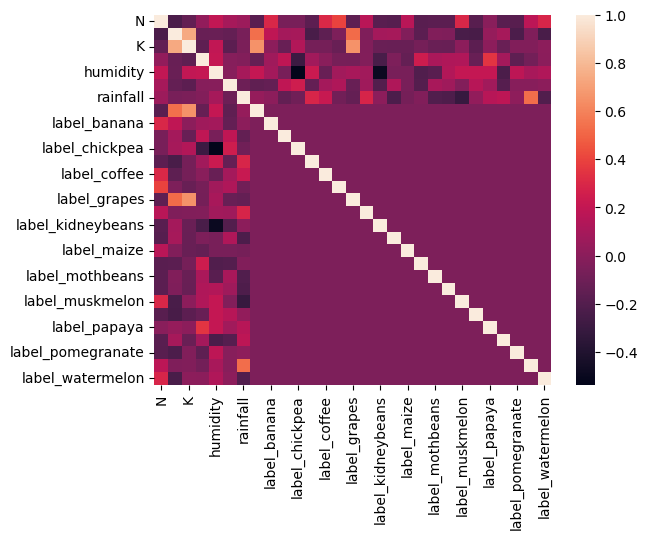

In [35]:
sns.heatmap(dfcrop.corr())